<a href="https://colab.research.google.com/github/rioAgustian/Fisika-Komputasi/blob/main/projectil_motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gerak Peluru (2D) dengan Hambatan Udara

Persamaan gerak benda adalah sebagai berikut

\begin{align}
\vec{a_x} &= -\frac{k}{m}\lvert v \rvert \vec{v_x}\\
\vec{a_y} &= -\frac{k}{m}\lvert v \rvert \vec{v_y}-g\\
\end{align}

Dengan

$\vec{a_x}$ = komponen percepatan sumbu x 

$\vec{a_y}$ = komponen percepatan sumbu y

$\vec{v_x}$ = komponen kecepatan sumbu x 

$\vec{v_y}$ = komponen kecepatan sumbu y

$\lvert v \rvert = \sqrt{\vec{v_x}^2 + \vec{v_y}^2}$

$\vec{x}$ = komponen posisi benda sumbu x

$\vec{y}$ = komponen posisi benda sumbu y

$g$ = percepatan gravitasi bumi

$k = \frac{C_d \rho A}{2}$


In [127]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [128]:
# parameter
r = 0.03        # m
A = np.pi*r**2  # m^2
cd = 0.46       # dimensionless
g = 9.8         # m/s^2
m = 0.1         # kg
rho = 1.2       # kg/m^3

# merapikan parameter
params = (A, cd, g, m, rho)

In [129]:
# model persamaan diferensial
def dSdt(t, S, A, cd, g, m, rho):
  k = (cd*rho*A)/(2*m)
  x, y, vx, vy = S
  v = np.sqrt(vx**2 + vy**2)
  return[vx,
         vy,
         -k * v * vx,
         -k * v * vy - g]

In [130]:
# kondisi awal / initial values
x0 = 0
y0 = 0
v = 25
theta = np.radians(37) 
v0x = v * np.cos(theta)
v0y = v * np.sin(theta)

# merapikan kondisi awal
S0 = (x0, y0, v0x, v0y)

# pewaktuan
min_t = 0
max_t = 3
t = np.linspace(min_t, max_t, 50)

In [131]:
# menggunakan solve_ivp
sol = solve_ivp(dSdt, t_span=(min_t, max_t), t_eval=t,
                y0=S0, args=params, 
                rtol=10e-10)

# solusi
t = sol.t
x = sol.y[0]
y = sol.y[1]
vx = sol.y[2]
vy = sol.y[3]

In [132]:
# gerak peluru tanpa hambatan udara
# nf = no friction
xnf = v0x * t
ynf = v0y * t - 1/2 * g * t**2

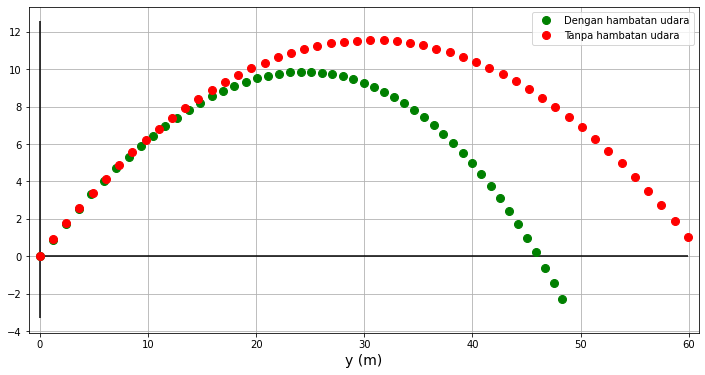

In [133]:
# plotting
plt.figure(figsize=(12, 6))
plt.plot(x, y, "go", markersize=8, label="Dengan hambatan udara")
plt.plot(xnf, ynf, "ro", markersize=8, label="Tanpa hambatan udara")
plt.xlabel("x (m)", fontsize=14)
plt.xlabel("y (m)", fontsize=14)
plt.xlim(-1, max(xnf)+1)
plt.legend()
plt.grid()

# mengatur garis hitam (sumbu x dan y)
plt.hlines(0, 0, max(xnf))
plt.vlines(0, min(y)-1, max(ynf)+1)
plt.show()

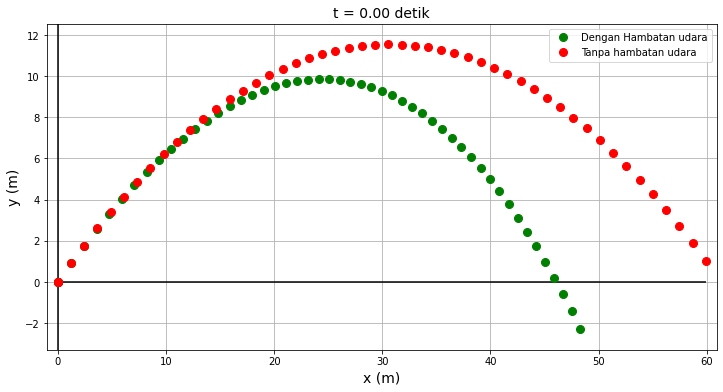

In [134]:
# membuat animasi
from matplotlib import animation
from matplotlib.animation import FuncAnimation

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

ax.set_xlim(-1, max(xnf)+1)
ax.set_ylim(min(y)-1, max(ynf)+1)

ax.hlines(0, 0, max(xnf))
ax.vlines(0, min(y)-1, max(ynf)+1)

ax.set_xlabel("x (m)", fontsize=14)
ax.set_ylabel("y (m)", fontsize=14)

txt_title = ax.set_title("", fontsize=14)
line1, = ax.plot([], [], "go", markersize=8)     
line2, = ax.plot([], [], "ro", markersize=8)

ax.legend(["Dengan Hambatan udara","Tanpa hambatan udara"])
ax.grid()

# dummies list
xx = []
yy = []
xxnf = []
yynf = []

def draw(i):
  xx.append(x[i])
  yy.append(y[i])
  xxnf.append(xnf[i])
  yynf.append(ynf[i])
  line1.set_data(xx, yy)
  line2.set_data(xxnf, yynf)
  txt_title.set_text("t = {0:0.2f} detik".format(i*0.06))
  return (line1, line2)

peluru = FuncAnimation(fig=fig, frames=50, func=draw, interval=60)

from IPython.display import HTML
HTML(peluru.to_html5_video())